```{admonition} Lecture Materials
:class: tip
[Download the slide deck for this lecture](https://github.com/vlvovch/PHYS6350-ComputationalPhysics/blob/spring2025/slides/Lecture19-04-03-25-StatisticalPhysics.pdf)
```

# Markov chains and Metropolis algorithm

## Statistical averages and importance sampling

For a system in statistical equilibrium at given temperature, the probability that the system is
in a given microstate $i$ is given by the 
Boltzmann formula:

$$
P(E_i) = \frac{e^{-\beta E_i}}{Z},
$$

where $\beta = 1/(k_BT)$ is the inverse temperature, $E_i$ is the energy in state $i$, and $Z = \sum_i e^{-\beta E_i}$ is the partition function.

Main interest typically lies in calculating the average of various physical observables.
For an arbitrary quantity $X$ it reads

$$
\langle X \rangle = \sum_i X_i P(E_i),
$$

where $X_i$ is the value of quantity $X$ in microstate $i$.
Numerical methods become useful when it is impossible to compute the partition function or the sum analytically.

One possible way to estimate $\langle X \rangle$ is to sample each microstate uniformly at random, calculate $X_i$ and accept with a weight proportional to $P(E_i)$. If we have $N$ samples, the estimate for $\langle X \rangle$ reads

$$
\langle X \rangle = \frac{\sum_{k=1}^N X_k P(E_k)}{\sum_{k=1}^N P(E_k)} = \frac{\sum_{k=1}^N X_k e^{-\beta E_k}}{\sum_{k=1}^N e^{-\beta E_k}}~.
$$

This method does not require the evaluation of the partition function $Z$.
However, the method is not very efficient because it will typically sample states that do not contribute much to the final result due large penalty from the Boltzmann factor $e^{-\beta E_k}$.

The importance sampling method is more efficient. Instead of choosing the microstates uniformly, one samples them with probability proportional to the Boltzmann exponent, $P_i \propto e^{-\beta E_i}$.
In this case

$$
\langle X \rangle = \sum_i X_i P(E_i) = \sum_i X_i P_i,
$$

and thus it is approximated by simple average from $N$ observations

$$
\langle X \rangle = \sum_i X_i P(E_i) \simeq \frac{1}{N} \sum_{k=1}^N X_k.
$$

## Markov chain method

How to pick states from the distribution $P_i = e^{-\beta E_i} / Z$?
In most cases we cannot even computed $Z$, and thus the normalized probabilities $P_i$.
It turns out we don't have to.
The distribution can be simulated using a device called **Markov chain**.

This proceeds as follows. We want to choose states from the distribution $P_i = e^{-\beta E_i} / Z$ for evaluating $\langle X \rangle$. We do so via an iterative procedure. Let us have state $i$ at the present step drawn from $P_i$ and we want to move to a new state $j$.
To do that we introduce transition probalities $T_{ij}$ which, being probabilities, satisfy

$$
\sum_j T_{ij} = 1.
$$

The Markov chain method stipulates choosing $T_{ij}$ such that 

$$
\frac{T_{ij}}{T_{ji}} = \frac{P_j}{P_i} = \frac{e^{-\beta E_j} /Z}{e^{-\beta E_i} / Z} = e^{-\beta(E_j - E_i)}.
$$

Imagine that, at the current step, the probability to have state $i$ is given by the Boltzmann distribution, $P_i$.
The probabilty to have state $j$ at the next step is then

$$
\sum_i T_{ij} P_i = \sum_i T_{ji} P_j = P_j \sum_i T_{ji} = P_j.
$$

Therefore, if we start from the Boltzmann distribution, all the subsequent samples will also correspond to the Boltzmann distribution. It can also be proven that starting from some initial state sampled from arbitrary distribution, the subsequent state of the Markov chain will eventually converge to the Boltzmann distribution, during the so-called **equilibration** phase.

## Metropolis algorithm

Metropolis algorithm is a way to simulate the Markov chain with $T_{ij}$ that satisfy the conditions above.

The method works as follows:
Suppose that we have a move set -- $M$ different ways to move from state $i$ to state $j$, and vice versa. 

1. We pick a move to state $j$ uniformly at random (thus the probability for each one is $1/M$).

2. We then calculate the energy $E_j$ of the candidate state $j$ and compare it to the energy $E_i$ of the current step $i$. 
    1. If $E_j < E_i$, the move is accepted. 
    2. If $E_j > E_i$, the move can still be accepted, but with a probability

    $$
    P_{a} = e^{-\beta (E_j - E_i)}.
    $$
   
In this way we satisfy the condition

$$
\frac{T_{ij}}{T_{ji}} = e^{-\beta (E_j - E_i)}.
$$

Indeed, if e.g. $E_j > E_i$, the probability to select state $j$ is $1/M$ and the probability to accept is $e^{-\beta (E_j - E_i)}$, thus the total transition probability is 

$$
T_{ij} = \frac{1}{M} e^{-\beta (E_j - E_i)}.
$$

If we are in state $j$, the probability to select state $i$ is $1/M$, which is then accepted unconditionally since $E_i < E_j$, thus

$$
T_{ji} = \frac{1}{M}.
$$

The ratio clearly satisfies the Markov chain method condition

$$
\frac{T_{ij}}{T_{ji}} = e^{-\beta (E_j - E_i)}.
$$

The full Metropolis algorithm proceeds as follows:
1. Choose a random starting state
2. Choose a move uniformly at random to a new state. A single move can entail, for instance, changing the state of a single molecule picked randomly.
3. Calculate the value of the acceptance probablity $P_a$ and accept the move with this probability.
4. Measure the quantity of interest $X$ in the new state and add it to the average.
5. Repeat from step 2.

Note that it is possible that the system stays in the present state, $i \to i$. This is a perfectly valid step which should be accepted.

## Ideal gas in a box

We can use the Metropolis algorithm to simulate the behavior of the ideal gas.

### Particle in a box

Recall the energy levels of a particle in a box of length $L$.
These are obtained by solving Schroedinger's equation for a free particle

$$
-\frac{\hbar^2}{2m} \frac{d^2}{dx^2} \psi(x) = E \psi(x),
$$

with boundary conditions $\psi(0) = \psi(L) = 0$.

The energy levels read

$$
E_n = \frac{\pi^2 \hbar^2}{2mL^2} n^2, \qquad n = 1,2\ldots
$$

In three dimensions (cube) we have contributions from the three directions, thus

$$
E_{n_x,n_y,n_z} =  \frac{\pi^2 \hbar^2}{2mL^2} (n_x^2 + n_y^2 + n_z^2), \qquad n_x, n_y, n_z = 1,2,\ldots
$$

### Particle in a periodic box

Another possibility is periodic boundary conditions, $\psi(x) = \psi(x+L)$.
In this case the energy levels read

$$
E_{n_x,n_y,n_z} =  \frac{2 \pi^2 \hbar^2}{mL^2} (n_x^2 + n_y^2 + n_z^2), \qquad n_x, n_y, n_z = 0,1,\ldots
$$

Periodic boundary conditions are more natural for modeling properties of large systems.

### System of particles


When we have a system of $N$ particles, neglecting the quantum statistical effects, the total energy reads

$$
E = \sum_{i=1}^N E_{n_x^{(i)},n_y^{(i)},n_z^{(i)}}~.
$$

All the microstates can be enumerated by the individual energy levels of each particle $n_x^{(i)},n_y^{(i)},n_z^{(i)}$.

The probability to have a particular state is given by the Boltzmann distribution

$$
P \propto e^{-\beta E}.
$$

### Metropolis algorithm

The simulation using the Metropolis algorithm proceeds by randomly changing $n_x^{(i)},n_y^{(i)},n_z^{(i)}$ and accepting then new state with a given probability.
We can define our move set as follows:

1. Given the present configuration $n_x^{(i)},n_y^{(i)},n_z^{(i)}$ we randomly pick a particle, and try to increase or decrease one its components, $n_x^{(i)}$, $n_y^{(i)}$, or $n_z^{(i)}$ by one.
2. If the move is not allowed (e.g. $n_x^{(i)}$ becomes less than one) the present state is preserved.
3. Otherwise, we accept the new state with the Metropolis probability $P_a = \min(1, e^{-\beta (E_j - E_i)})$.

### Simulation

In [2]:
import numpy as np

# Work with m = 1, hbar = 1, L = 1
# If True, use periodic boundary conditions
periodicBC = False

# Calculate energy of a particle in a state n = (nx,ny,nz)
# periodicBC: apply periodic BC
def En(n, periodicBC):
    nx = n[0]
    ny = n[1]
    nz = n[2]
    factor = 0.5
    if (periodicBC):
        factor = 2.
    return factor * np.pi**2 * (nx**2 + ny**2 + nz**2)

# Simulates the ideal gas of N particles at temperature T
# by performing Markov chain steps using Metropolis algorithm
# Returns an array energies normalized by the number of particles times the temperature
def simulateIdealGas(T, N, steps, periodicBC):
    # Initialization
    n = np.ones([N,3],int)
    E = 0
    for i in range(N):
        E += En(n[i], periodicBC)

    # Energy per particle normalized by T
    eplot = [ E / (N * T) ]

    for k in range(steps):
        # Choose the particle
        i = np.random.randint(N)
        # Choose the component
        j = np.random.randint(3)
        tn = n[i].copy()
        # Choose the direction
        if (np.random.rand() < 0.5):
            tn[j] += 1
        else:
            tn[j] -= 1

        # If n becomes negative, by symmetry set it to positive (periodic BC)
        if (tn[j] == -1 and periodicBC):
            tn[j] = 1

        # Avoid n = 0 states if not periodic BC
        if (tn[j] == 0 and not periodicBC):
            tn[j] = 1

        # Energy difference
        dE = En(tn, periodicBC) - En(n[i], periodicBC)

        if (np.random.rand() < np.exp(-dE/T)):
            n[i,j] = tn[j]
            E += dE

        eplot.append(E / (N * T))
        
    return eplot

Let us simulate the system of $N = 1000$ for three different values of the temperature. Here we do not use periodic boundary conditions.

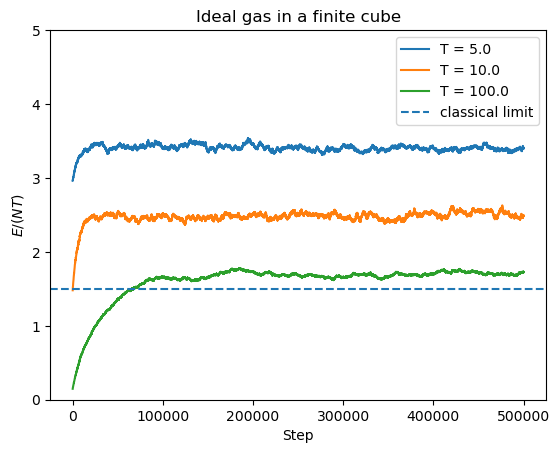

In [3]:
N = 1000
steps = 500000
periodicBC = False
Ts = [5. , 10., 100.]
eplots = []

for T in Ts:
    eplots.append(simulateIdealGas(T, N, steps, periodicBC))

# Make the graph
import matplotlib.pyplot as plt

plt.ylim(0,5)
for i in range(len(Ts)):
    leg = "T = " + str(Ts[i])
    plt.plot(eplots[i],label=leg)

if (periodicBC):
    plt.title("Ideal gas in a finite cube with periodic boundary conditions")
else:
    plt.title("Ideal gas in a finite cube")
plt.axhline((3/2),linestyle='--',label='classical limit')
plt.xlabel("Step")
plt.ylabel("${E/(NT)}$")
plt.legend()
plt.show()

At high temperatures the result approaches

$$
E = \frac{3NT}{2},
$$

of an ideal Boltzmann gas without energy levels quantization (thermodynamic limit).

Let us try the same calculation with periodic boundary conditions

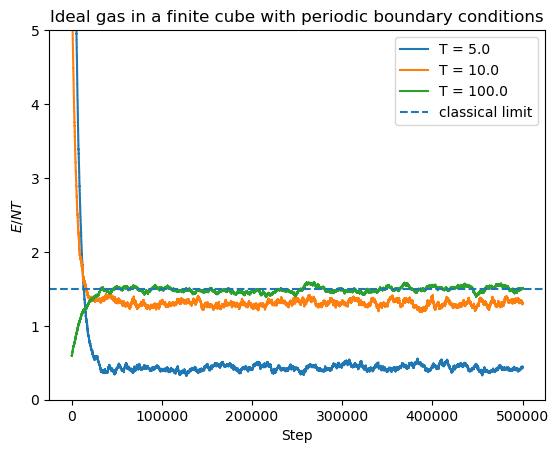

In [4]:
N = 1000
steps = 500000
periodicBC = True
Ts = [5., 10., 100.]
eplots = []

for T in Ts:
    eplots.append(simulateIdealGas(T, N, steps, periodicBC))

# Make the graph
import matplotlib.pyplot as plt

plt.ylim(0,5)
for i in range(len(Ts)):
    leg = "T = " + str(Ts[i])
    plt.plot(eplots[i],label=leg)

if (periodicBC):
    plt.title("Ideal gas in a finite cube with periodic boundary conditions")
else:
    plt.title("Ideal gas in a finite cube")
plt.axhline((3/2),linestyle='--',label='classical limit')
plt.xlabel("Step")
plt.ylabel("${E/NT}$")
plt.legend()
plt.show()